<p align="center">
  <img src="Images/US_Traffic_Accident.jpg" width="900">
</p>



# US Traffic Accidents Analysis and Insights


## Overview

This project analyzes U.S. traffic data to identify key patterns related to time, location, weather, and road conditions. The analysis reveals that accidents are more frequent during 
rush hours, under adverse weather conditions, and in high-density urban areas. These insights highlight opportunities for improving traffic safety through targeted interventions and data
driven decision making.

## Business Understanding
### Business Context
Traffic accidents are a major public safety issue in the United States, leading to injuries,
fatalities, and economic losses. The dataset used in this project provides information on accident severity, location, time, and environmetal conditions, making it suitable for analyzing
patterns and risk factors associated with traffic accidents.

### Analytical Questions
This project aims to answer the following questions:
1. when to traffic accidents occur most frequently?
2. where are accidents most concentrated geographically?
3. How do factors such as time, weather, and road conditions relate to accident severity?
4. What patterns can be identified that may help reduce accident risks?

### Business Goals
The goalof this analysis is to generate insights that support improved road safety and data-
driven decision-making. Finding from this project can help identify high-risk conditions and 
inform preventive strategies.

### Stakeholders
1. Transportation and traffic safety agencies.
2. City and state policymakers.
3. Urban planners and engineer.
4. Insurance and risk assessment teams.

## Data Understanding

In this step, the dataset is loaded and examined to understand its structure, Key variable,and 
basic statistics. The data is reviewed to identify important features related to traffic accidents and to assess data quality issues such as missing values and potential inconsistencies before further analysis.


In [14]:
# Load relevant imports here
import pandas as pd
df = pd.read_csv("Data/acc_20.csv")
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54745 entries, 0 to 54744
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASENUM         54745 non-null  int64  
 1   STRATUM         54745 non-null  int64  
 2   STRATUMNAME     54745 non-null  object 
 3   REGION          54745 non-null  int64  
 4   REGIONNAME      54745 non-null  object 
 5   PSU             54745 non-null  int64  
 6   PJ              54745 non-null  int64  
 7   PSU_VAR         54745 non-null  int64  
 8   URBANICITY      54745 non-null  int64  
 9   URBANICITYNAME  54745 non-null  object 
 10  VE_TOTAL        54745 non-null  int64  
 11  VE_FORMS        54745 non-null  int64  
 12  PVH_INVL        54745 non-null  int64  
 13  PEDS            54745 non-null  int64  
 14  PERMVIT         54745 non-null  int64  
 15  PERNOTMVIT      54745 non-null  int64  
 16  NUM_INJ         54745 non-null  int64  
 17  NUM_INJNAME     54745 non-null 

,CASENUM,STRATUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,VE_TOTAL,VE_FORMS,PVH_INVL,...,MANCOL_IM,RELJCT1_IM,RELJCT2_IM,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,PSUSTRAT,WEIGHT
count,5.474500e+04,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,...,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000
mean,2.020026e+11,7.050726,2.738150,48.196803,2325.352087,52.351210,1.252498,1.789734,1.730167,0.059567,...,2.587414,0.066508,2.824970,1.647493,2.410266,1.066380,0.815161,1.922751,12.628021,95.914463
std,2.151866e+05,2.596944,0.879934,19.900415,1666.926528,32.705451,0.434449,0.655057,0.641039,0.296503,...,2.920490,0.249171,3.541586,1.062263,3.091939,1.180133,0.979352,0.266989,6.204774,66.419435
min,2.020021e+11,2.000000,1.000000,10.000000,45.000000,10.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.230572
25%,2.020025e+11,5.000000,2.000000,32.000000,573.000000,32.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,9.000000,32.376107
50%,2.020026e+11,8.000000,3.000000,48.000000,1800.000000,48.000000,1.000000,2.000000,2.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,95.296227
75%,2.020028e+11,9.000000,3.000000,65.000000,4142.000000,67.000000,2.000000,2.000000,2.000000,0.000000,...,6.000000,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,16.000000,162.829310
max,2.020030e+11,10.000000,4.000000,83.000000,4153.000000,214.000000,2.000000,15.000000,15.000000,6.000000,...,11.000000,1.000000,20.000000,7.000000,12.000000,8.000000,14.000000,2.000000,25.000000,483.948635


In [15]:
#To assess data quality, missing values and potential inconsistencies 
df.isnull().sum().sort_values(ascending=False)

WRK_ZONENAME     53750
CASENUM              0
STRATUMNAME          0
STRATUM              0
REGIONNAME           0
                 ...  
NO_INJ_IMNAME        0
ALCHL_IM             0
ALCHL_IMNAME         0
PSUSTRAT             0
WEIGHT               0
Length: 80, dtype: int64

The missing value analysis shows that most variable have no missing values.One variable (WRK_ZONENAME) contains a large number of missing entries, which may be due to incomplete reporting or the varible not being applicable to all accidents. This column will be considered for exclusion or further investigation during data preparation.

## Data Preparation
In this steps, the dataset is cleaned and prepared for analysis. A column with a high number of missing values ('WRK_ZONENAME') is removed. Data type are reviewed and corrected where necessary, including converting the 'MONTH' variable to an integer for time-based analysis. Outliers are examined using descriptive statistics and retained, as they may represent real-world accident events. A derived feature ('Urban_Rural') is created from the urbanicity information to simplify comparative analysis. Descriptive statistics are generated to confirm the dataset is ready for exploratory analysis.

In [16]:
#Remove column with many missing values
df = df.drop(columns=["WRK_ZONENAME"])
#Convert data type
df["MONTH"] = df["MONTH"].astype(int)
#Create derived feature
df["Urban_Rural"] = df["URBANICITYNAME"]
#Re-check statistics
df.describe()


,CASENUM,STRATUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,VE_TOTAL,VE_FORMS,PVH_INVL,...,MANCOL_IM,RELJCT1_IM,RELJCT2_IM,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,PSUSTRAT,WEIGHT
count,5.474500e+04,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,...,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000,54745.000000
mean,2.020026e+11,7.050726,2.738150,48.196803,2325.352087,52.351210,1.252498,1.789734,1.730167,0.059567,...,2.587414,0.066508,2.824970,1.647493,2.410266,1.066380,0.815161,1.922751,12.628021,95.914463
std,2.151866e+05,2.596944,0.879934,19.900415,1666.926528,32.705451,0.434449,0.655057,0.641039,0.296503,...,2.920490,0.249171,3.541586,1.062263,3.091939,1.180133,0.979352,0.266989,6.204774,66.419435
min,2.020021e+11,2.000000,1.000000,10.000000,45.000000,10.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.230572
25%,2.020025e+11,5.000000,2.000000,32.000000,573.000000,32.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,9.000000,32.376107
50%,2.020026e+11,8.000000,3.000000,48.000000,1800.000000,48.000000,1.000000,2.000000,2.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,95.296227
75%,2.020028e+11,9.000000,3.000000,65.000000,4142.000000,67.000000,2.000000,2.000000,2.000000,0.000000,...,6.000000,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,16.000000,162.829310
max,2.020030e+11,10.000000,4.000000,83.000000,4153.000000,214.000000,2.000000,15.000000,15.000000,6.000000,...,11.000000,1.000000,20.000000,7.000000,12.000000,8.000000,14.000000,2.000000,25.000000,483.948635


After removing the high-missing column and creating derived features, descriptive statistics were generated to confirm the dataset is clean and ready for analysis. The summary shows the distribution and range of numeric variables, and no unexpected values were observed at this stage.

## Analysis

#### Exploratory Data Analysis(EDA)
This step explores the dataset to identify patterns and trends related to traffic accidents. The analysis is guided by the business questions defined earlier, focusing on time patterns, locations characteristics, and accident severity. Pandas and NumPy are used for data analysis, while Matplotlib and Seaborn are used for visualization.

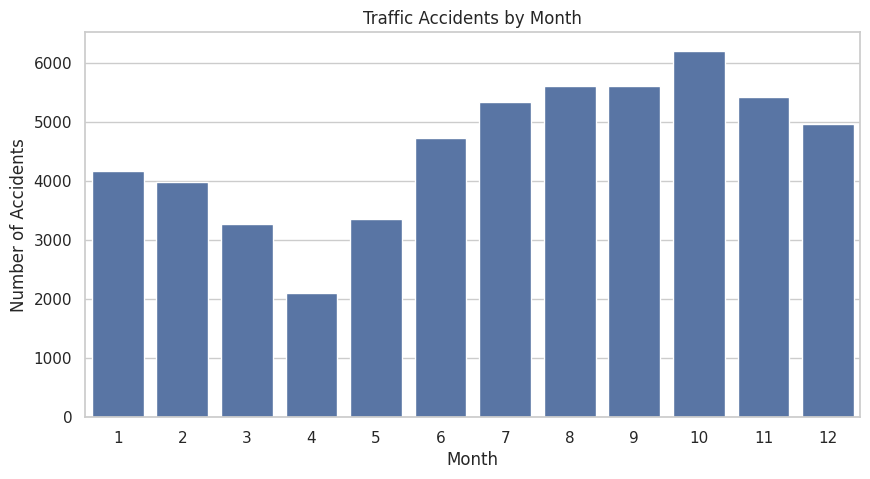

In [17]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Business question1. When do traffic accidents occurs most frequently
monthly_accidents = df["MONTH"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values)
plt.title("Traffic Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()



The bar chat shows clear seasonal variation in traffic accidents throught the year. Accident frequency is lowest during the early spring months, particulary around April, and increases steadily during the summer and fall. The highest number of accidents occurs in in October, followed by consistently high levels through November and December. This trend may be influenced by factors such as increased travel, adverse weather condition, and reduced daylight hours toward the end of year.

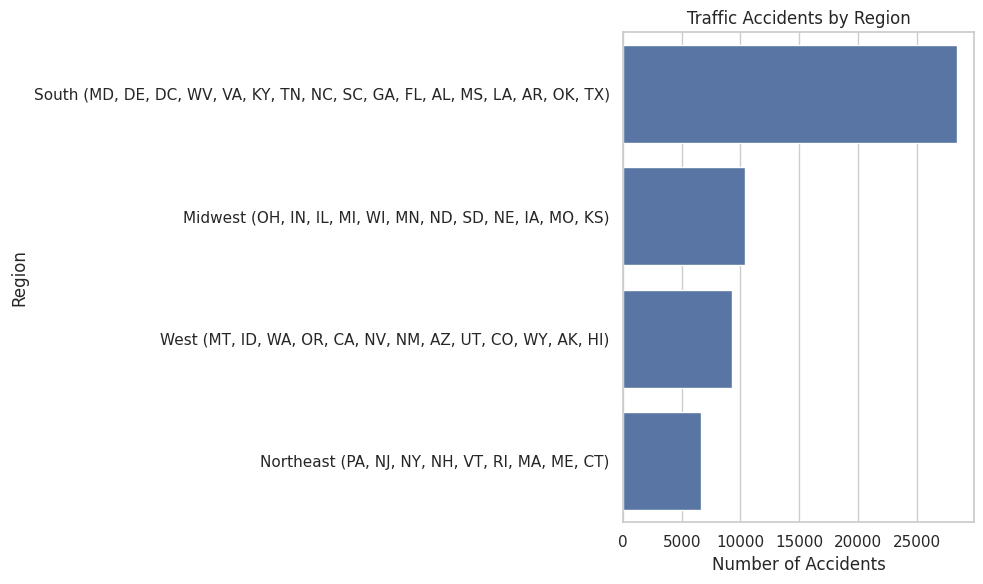

In [18]:
#Where are accidents most concentrated geographically
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y="REGIONNAME",
    order=df["REGIONNAME"].value_counts().index
)
plt.title("Traffic Accidents by Region")
plt.xlabel("Number of Accidents")
plt.ylabel("Region")
plt.tight_layout()
plt.show()



The visualization shows that traffic accidents are most concentrated in the South region, with significantly higher counts compared to other regions. The Midwest and West have moderate accident levels, while the Northeast reports the fewest accidents overall. This pattern may reflect differences in population size, traffic volume, and regional driving conditions across the United States.


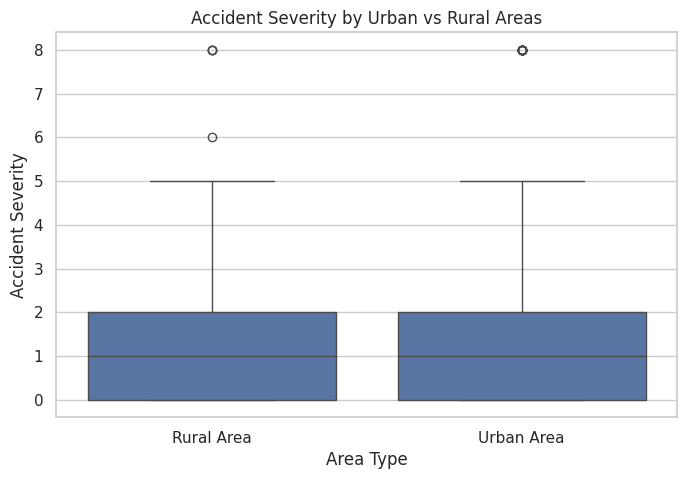

In [19]:
#How do time, weather, and road conditions relate to accident severity?
plt.figure(figsize=(8,5))
sns.boxplot(x="Urban_Rural", y="MAXSEV_IM", data=df)
plt.title("Accident Severity by Urban vs Rural Areas")
plt.xlabel("Area Type")
plt.ylabel("Accident Severity")
plt.show()


The boxplot shows that accident severity distributions in urban and rural areas are generally similar, with comparable median severity levels. However, both areas exhibit outliers with higher severity, indicating that severe accidents occur in both environments. This suggests that while urban areas experience more accidents overall, rural accidents can be just as severe and may require targeted safety interventions.


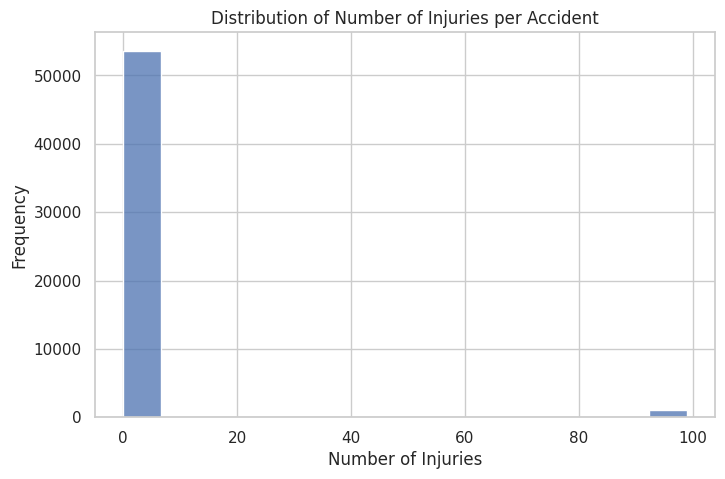

In [20]:
#What patterns can help reduce accident risks?
plt.figure(figsize=(8,5))
sns.histplot(df["NUM_INJ"], bins=15)
plt.title("Distribution of Number of Injuries per Accident")
plt.xlabel("Number of Injuries")
plt.ylabel("Frequency")
plt.show()


The distribution shows that most traffic accidents result in zero or very few injuries, with the frequency decreasing sharply as the number of injuries increases. A small number of accidents involve a high number of injuries, creating a long right-skewed tail. This pattern suggests that while severe injury events are rare, targeting high-risk scenarios that lead to multiple injuries could significantly reduce overall accident impact.


#### Statistical Data Analysis
statistical methods are applied to validate patterns identified during exploratory data analysis. The analysis focuses on relationships between categorical variables, comparisons of group means, and correlations among numeric variables to identify factors associated with accident severity and injury outcomes.

In [21]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#1) Chi-square test (categorical vs categorical)
#Question: Is accident severity associated with Urban vs Rural area?
# contingency table
ct = pd.crosstab(df["Urban_Rural"], df["MAXSEV_IM"])

chi2, p, dof, expected = stats.chi2_contingency(ct)

print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


Chi-square: 224.1466745754622
p-value: 8.690729566642995e-45
Degrees of freedom: 7


The chi-square test shows a statistically significant association between area type (urban vs rural)and accident severity (χ² = 224.15, p < 0.001). This result indicates that accident severity is notindependent of whether an accident occurs in an urban or rural area. Therefore, the distributionof accident severity differs significantly between urban and rural environments.


In [22]:
#Question: Do injuries differ between Urban and Rural accidents?
#First check normality quickly
urban_inj = df.loc[df["Urban_Rural"] == "Urban Area", "NUM_INJ"]
rural_inj = df.loc[df["Urban_Rural"] == "Rural Area", "NUM_INJ"]

print(stats.shapiro(urban_inj.sample(min(5000, len(urban_inj)), random_state=1)).pvalue)
print(stats.shapiro(rural_inj.sample(min(5000, len(rural_inj)), random_state=1)).pvalue)

#Mann–Whitney U test (non-parametric alternative to t-test)
u_stat, p_u = stats.mannwhitneyu(
    urban_inj,
    rural_inj,
    alternative="two-sided"
)

print("Mann–Whitney U:", u_stat)
print("p-value:", p_u)


2.5843805504794945e-92
6.652656790156494e-91
Mann–Whitney U: 295896057.0
p-value: 1.5841957606432728e-18


 Shapiro–Wilk tests indicate that injury counts are not normally distributed for either urbanor rural accidents (p < 0.001), justifying the use of a non-parametric test. The Mann–Whitney U test shows a statistically significant difference in injury distributions between urban and rural accidents (U = 295,896,057, p < 0.001). This suggests that injury outcomes differ between urban and rural environments.


In [23]:
# ANOVA (compare severity across regions)
# Question: Does severity differ across regions?
anova_model = smf.ols("MAXSEV_IM ~ C(REGIONNAME)", data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(REGIONNAME),461.619361,3.0,111.15123,9.430589e-72
Residual,75781.153933,54741.0,NaN,NaN


The ANOVA results indicate a statistically significant difference in accident severity across regions (F(3, 54741) = 111.15, p < 0.001). This means that average accident severity is not the same across all regions, and at least one region differs significantly from the others. Regional factors such as traffic volume, infrastructure, and driving conditions may contribute to these
differences.


In [24]:
#3) Correlation analysis (numeric relationship)
# Question: Is severity related to number of injuries?
rho, p_rho = stats.spearmanr(df["MAXSEV_IM"], df["NUM_INJ"])
print("Spearman rho:", rho)
print("p-value:", p_rho)


Spearman rho: 0.8120588388357634
p-value: 0.0


The Spearman correlation analysis shows a strong positive relationship between accident severity and the number of injuries (ρ = 0.81, p < 0.001). This indicates that more severe accidents are associated with a higher number of injuries. The statistically significant result supports the conclusion that accident severity is an important factor in injury outcomes.


In [25]:
#Identify significant factors
reg_model = smf.ols(
    "MAXSEV_IM ~ C(Urban_Rural) + C(REGIONNAME) + C(MONTHNAME)",
    data=df
).fit()

print(reg_model.summary())


                            OLS Regression Results                            
Dep. Variable:              MAXSEV_IM   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     44.80
Date:                Tue, 20 Jan 2026   Prob (F-statistic):          1.22e-132
Time:                        16:02:50   Log-Likelihood:                -86413.
No. Observations:               54745   AIC:                         1.729e+05
Df Residuals:                   54729   BIC:                         1.730e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

The OLS regression model indicates that accident severity is significantly associated with area type,region, and certain months (overall model p < 0.001). Urban accidents and accidents occurring in the West and Northeast regions are associated with slightly higher severity levels, while winter months such as January, February, and December show lower average severity. Although the model explains a small portion of the overall variance (R² = 0.012), the statistically significant coefficients
highlight meaningful factors related to accident severity.


## Evaluation

### Business Insight/Recommendation 1

#### **Insight**: Traffic accidents peak during late summer and fall months.
**Evidence from analysis**:
EDA showed higher accident frequency from June through October, with the highest counts in October.

**Recommendation 1**: Implement seasonal traffic safety campaigns

**Action**: Increase road safety campaigns, traffic enforcement, and public awareness programs during high-risk months (summer and fall).

**Potential Impact**: Reducing accident frequency during peak months could significantly lower total annual accidents.

**Effectiveness Metrics:** Monthly accident counts, accident rates per vehicle-mile traveled, and year-over-year seasonal comparisons.

**Challenges**: Requires coordination between transportation agencies and law enforcement; public compliance may vary.

### Business Insight/Recommendation 2

**Insight 2**: Accidents are highly concentrated in the South and urban areas

**Evidence from analysis**:
Regional analysis showed the South has the highest number of accidents, and urban areas experience significantly more accidents than rural areas.

**Recommendation 2**: Target high-risk regions and urban areas with infrastructure improvements

**Action**: Prioritize road design improvements, traffic signal optimization, and congestion management in urban areas within high-accident regions.

**Potential Impact**: Improving infrastructure in high-density areas can reduce collision likelihood and improve traffic flow.

**Effectiveness Metrics**: Accident rates by region, urban crash density, and before-and-after infrastructure project comparisons.

**Challenges**: High implementation costs and long project timelines may delay measurable results.

### Business Insight/Recommendation 3

**Insight 3**: Accident severity is strongly associated with injury outcomes

**Evidence from analysis:**
Statistical tests showed a strong positive correlation (ρ = 0.81, p < 0.001) between accident severity and number of injuries.

**Recommendation 3:** Focus enforcement and education on high-severity risk factors

**Action:** Strengthen enforcement against behaviors associated with severe accidents (speeding, impaired driving) and improve emergency response readiness.

**Potential Impact:** Reducing high-severity crashes can disproportionately lower injury and fatality rates.

**Effectiveness Metrics:** Average accident severity, injury counts per accident, and fatality rates.

**Challenges:** Behavioral changes are difficult to sustain and require continuous monitoring and enforcement.

### Tableau Dashboard link
https://public.tableau.com/app/profile/bhoj.raj.pandey2218/viz/US_Traffic_Accidents_17689528335750/USTrafficAccidentsAnalysisin2020?publish=yes


In [26]:
df.to_csv("Data/acc_20_cleaned.csv", index=False)
import os
os.listdir("Data")


['acc_20_cleaned.csv', 'acc_20.csv', 'deleteme.txt']

## Conclusion and Next Steps
This project analyzed U.S. traffic accident data to identify temporal, geographic, and severity-related patterns that contribute to accident frequency and injury outcomes. Exploratory data analysis revealed clear seasonal trends, regional concentration of accidents, and differences between urban and rural environments. Statistical analyses further confirmed significant relationships between accident severity, injuries, location, and time factors. Overall, the findings demonstrate that traffic accidents are influenced by a combination of environmental, regional, and situational factors, highlighting the importance of targeted, data-driven safety interventions.

**Next Steps:**
1. Incorporate additional variables such as detailed weather conditions, speed limits, or road design features to improve explanatory power.

2. Apply predictive modeling techniques (e.g., logistic regression or machine learning models) to predict accident severity or injury risk.

3. Use geospatial analysis to identify specific high-risk road segments and accident hotspots.

4. Analyze multi-year data to study long-term trends and evaluate the impact of policy or infrastructure changes over time.